In [145]:
import numpy as np
import pandas as pd
import turicreate as tc
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
sales = tc.SFrame('kc_house_data.gl/')

In [147]:
tmp = tc.SArray([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print(tmp)
print(tmp_cubed)

[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


In [148]:
ex_sframe = tc.SFrame()
ex_sframe['power_1'] = tmp
print(ex_sframe)

+---------+
| power_1 |
+---------+
|   1.0   |
|   2.0   |
|   3.0   |
+---------+
[3 rows x 1 columns]



In [149]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = tc.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x: x**power)
    return poly_sframe

In [150]:
print(polynomial_sframe(tmp, 3))

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



In [151]:
sales = sales.sort(['sqft_living', 'price'])

In [152]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [153]:
poly1_data

power_1,price
290.0,142000.0
370.0,276000.0
380.0,245000.0
384.0,265000.0
390.0,228000.0
390.0,245000.0
410.0,325000.0
420.0,229050.0
420.0,280000.0
430.0,80000.0


In [154]:
model1 = tc.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 0.010150     | 7700000.000000     | 653047.733994                   |

| 1         | 2        | 0.029061     | 4362074.696077     | 261440.790724                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [155]:
model1.coefficients

name,index,value,stderr
(intercept),None,-43579.085251448734,4402.689697421986
power_1,None,280.62277088584665,1.9363985551296021


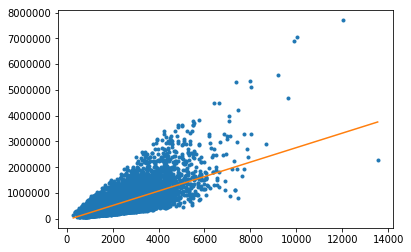

In [156]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

In [157]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = tc.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 0.010120     | 7700000.000000     | 653047.733994                   |

| 1         | 2        | 0.036063     | 5913020.984256     | 250948.368758                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [158]:
model2.coefficients

name,index,value,stderr
(intercept),None,199222.49644462604,7058.004835458268
power_1,None,67.99406406773414,5.28787201311385
power_2,None,0.03858123127891634,0.0008982465470250804


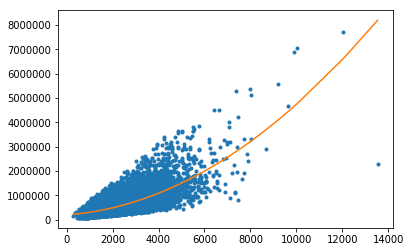

In [159]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')

In [160]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
my_features = poly3_data.column_names() # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
model3 = tc.linear_regression.create(poly3_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 0.019422     | 7700000.000000     | 653047.733994                   |

| 1         | 2        | 0.060489     | 3261066.736007     | 249261.286346                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [161]:
model3.coefficients

name,index,value,stderr
(intercept),None,336788.1179518386,10661.015370857054
power_1,None,-90.14762361191299,10.622289183903526
power_2,None,0.0870367150809884,0.0029663062313405072
power_3,None,-3.839852119598658e-06,2.241749095807333e-07


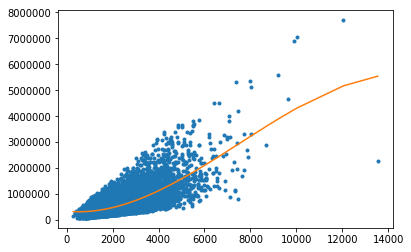

In [162]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data),'-')

In [163]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 0.011824     | 7700000.000000     | 653047.733994                   |

| 1         | 2        | 0.034498     | 2662308.584335     | 245690.511190                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [164]:
model15.coefficients

name,index,value,stderr
(intercept),None,73619.75209931335,205664.96481604868
power_1,None,410.28746256356203,749.3755184266138
power_2,None,-0.23045071444850107,1.1146672587530717
power_3,None,7.588405424981497e-05,0.0008940865318913976
power_4,None,-5.65701802621105e-09,4.3096110631135907e-07
power_5,None,-4.570281308814395e-13,1.3144044002040263e-10
power_6,None,2.6636020680234412e-17,2.5886748337677018e-14
power_7,None,3.3858476923645032e-21,3.286535852680555e-18
power_8,None,1.147231039269188e-25,2.781830943495844e-22
power_9,None,-4.6529358501648136e-30,2.1698408378182502e-26


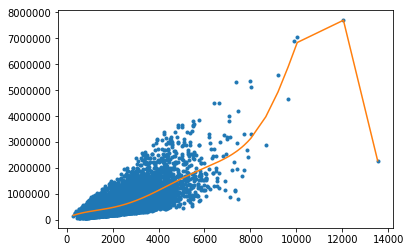

In [165]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')

In [166]:
def polynomial_regression_plot(degree, df):
    fig, axes = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(20,15))
    
    for i, ax in enumerate(axes.flatten(), 1):
        poly_data = polynomial_sframe(df['sqft_living'], i)
        features = poly_data.column_names() # get the name of the features
        poly_data['price'] = df['price'] # add price to the data since it's the target
        model = tc.linear_regression.create(poly_data, target = 'price', features = features, validation_set = None, verbose=False)
        
        if i == degree:
            print(model.coefficients[-1])
            
        ax.plot(poly_data['power_1'], 
                     poly_data['price'],'.', 
                     poly_data['power_1'], 
                     model.predict(poly_data),'-')
    
    plt.show()

{'name': 'power_15', 'index': None, 'value': 1.3988169057583824e-54, 'stderr': 1.060898157145123e-51}


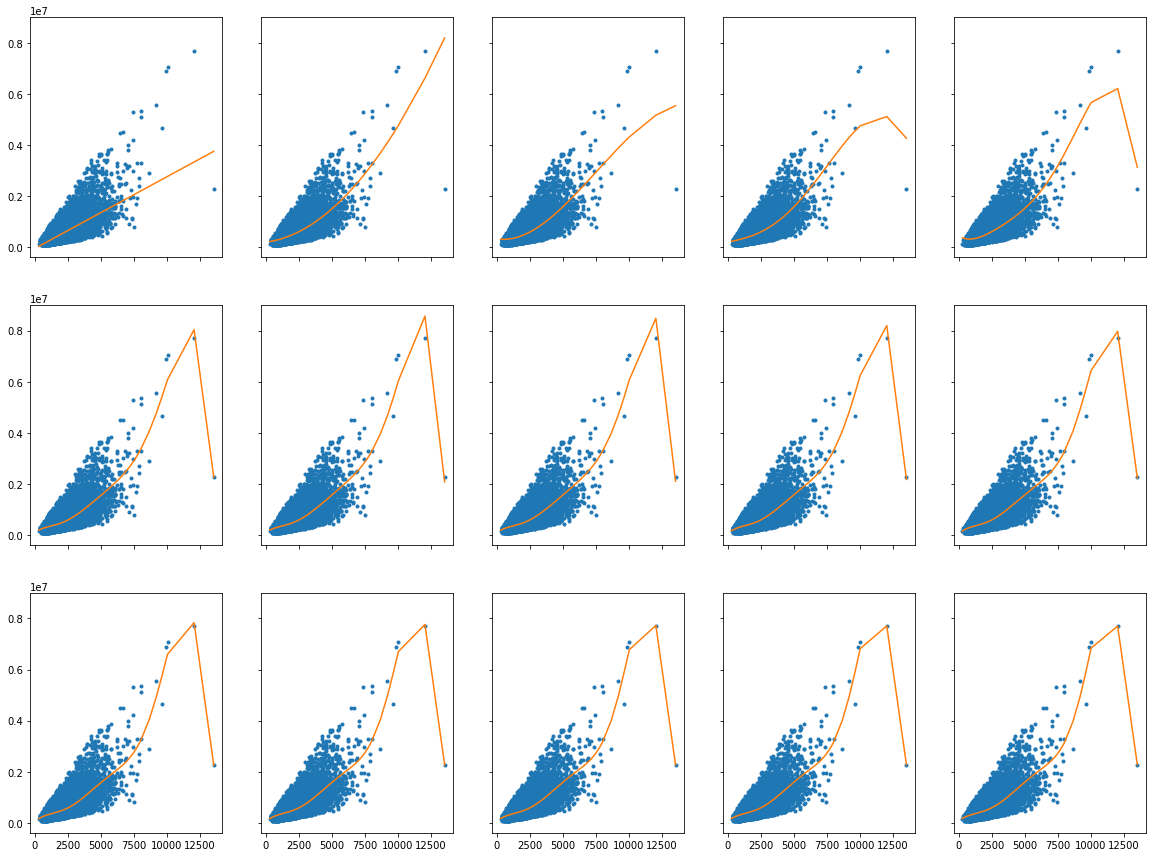

In [167]:
polynomial_regression_plot(15, sales)

In [168]:
half_1, half_2 = sales.random_split(0.5, seed=0)

In [169]:
set_1, set_2 = half_1.random_split(0.5, seed=0)
set_3, set_4 = half_2.random_split(0.5, seed=0)

{'name': 'power_15', 'index': None, 'value': 5.019752328232239e-55, 'stderr': 9.087953171661395e-52}


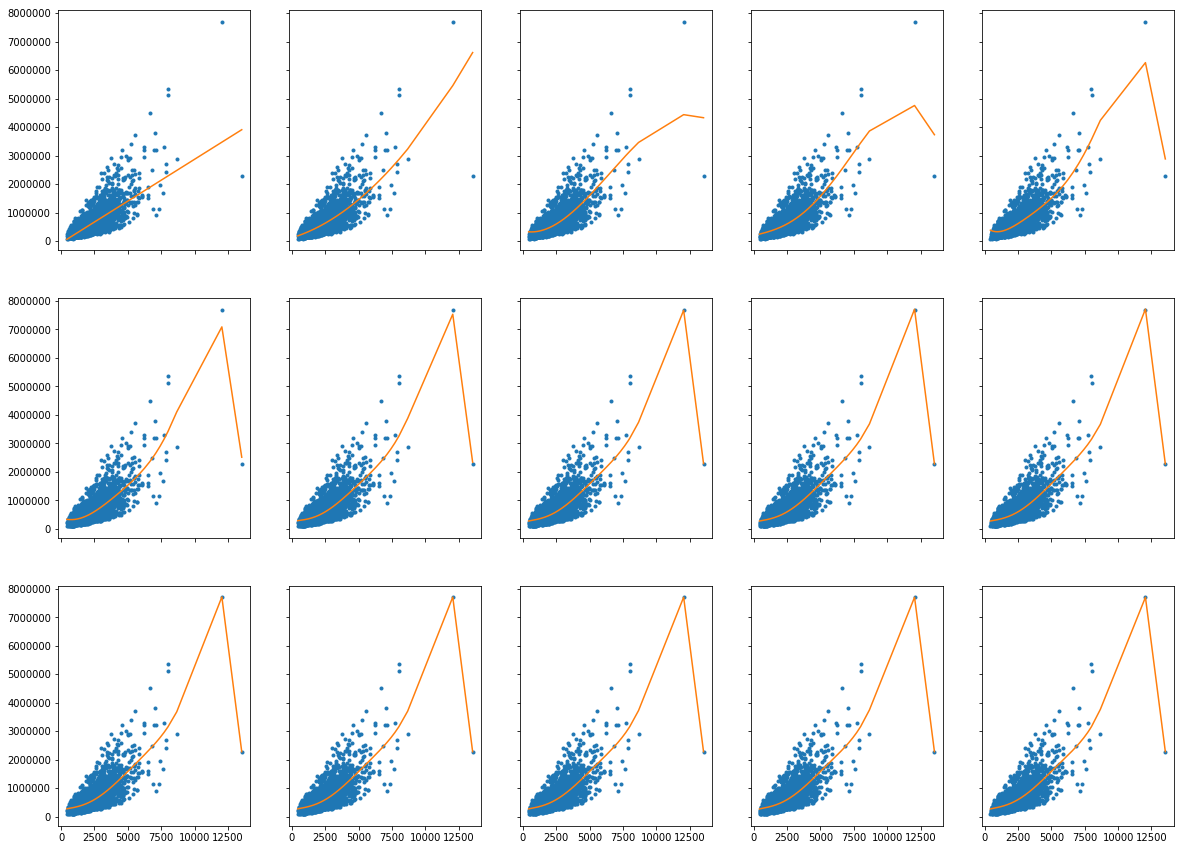

In [170]:
polynomial_regression_plot(15, set_1)

{'name': 'power_15', 'index': None, 'value': 1.6863665834237233e-52, 'stderr': 1.7485865800222084e-49}


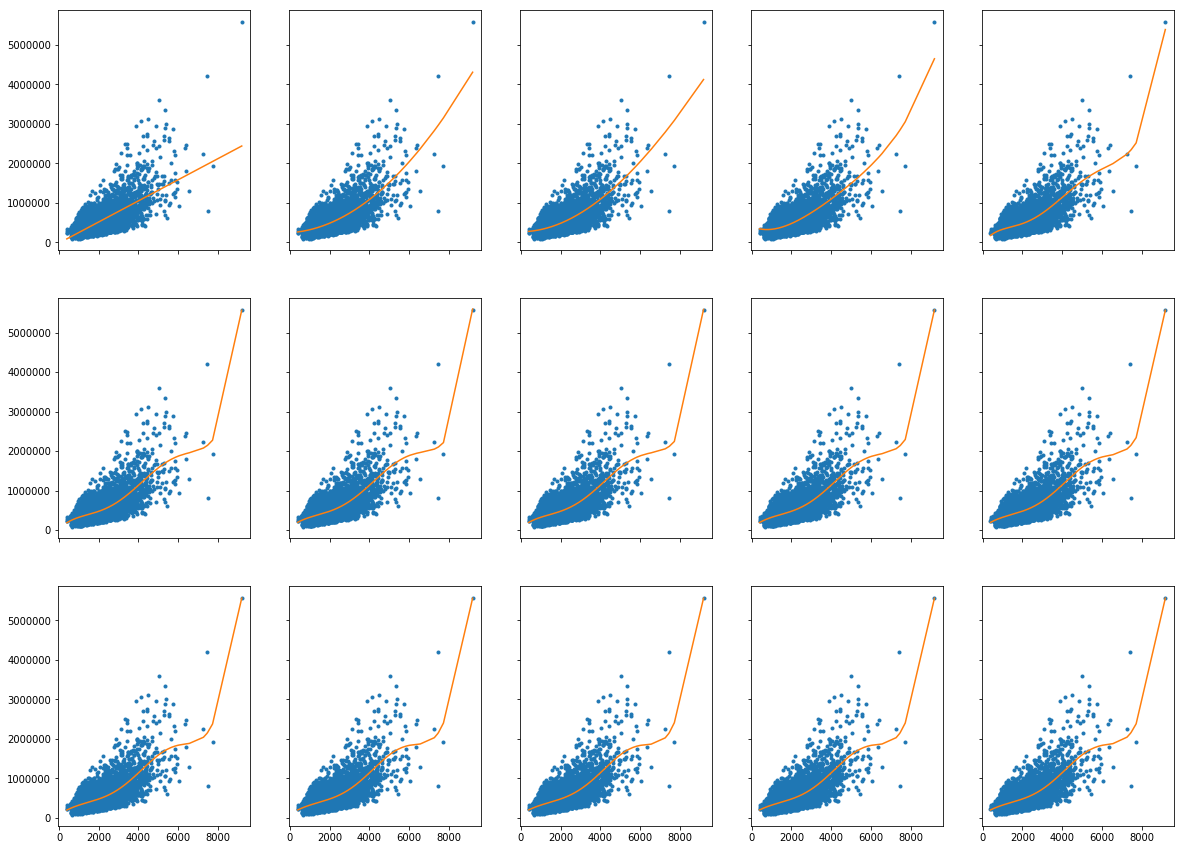

In [171]:
polynomial_regression_plot(15, set_2)

{'name': 'power_15', 'index': None, 'value': 6.390458860640316e-53, 'stderr': 2.7156656497985687e-50}


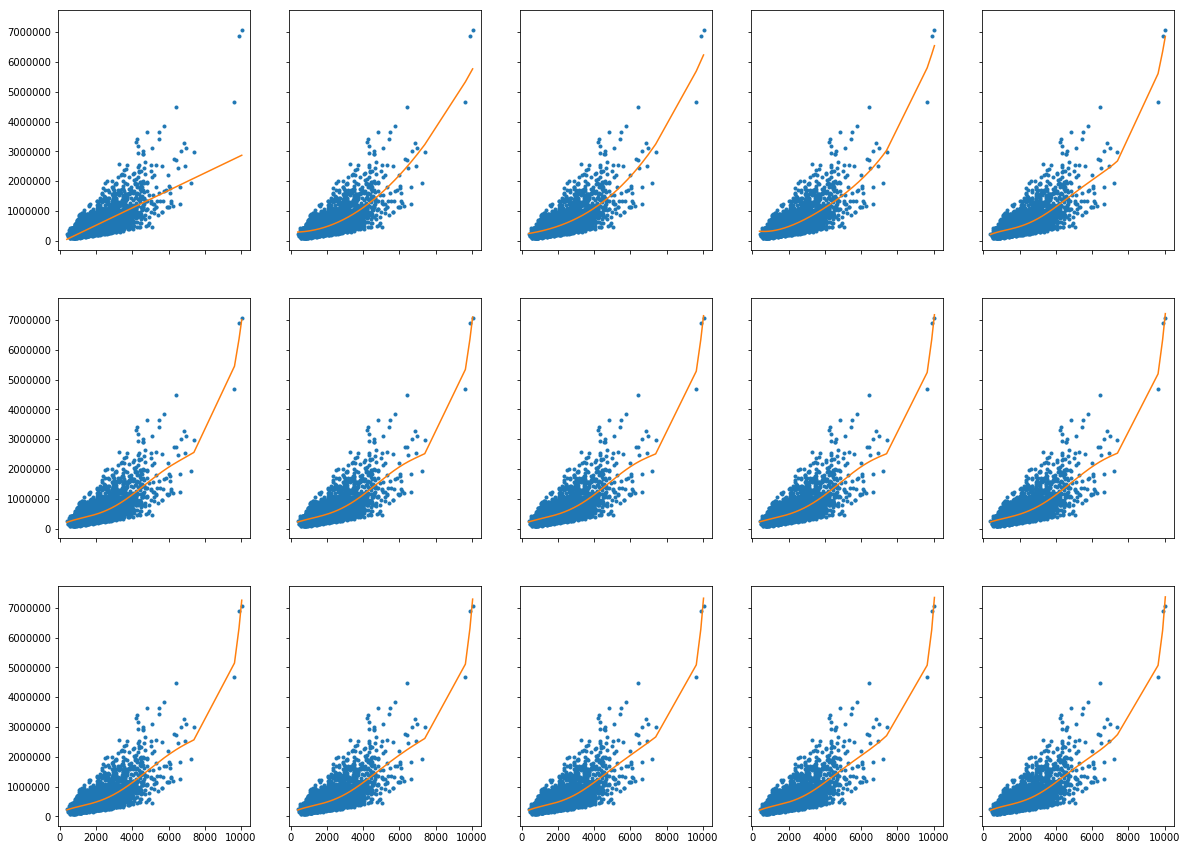

In [172]:
polynomial_regression_plot(15, set_3)

{'name': 'power_15', 'index': None, 'value': -4.745353330776864e-51, 'stderr': 8.856033010699934e-49}


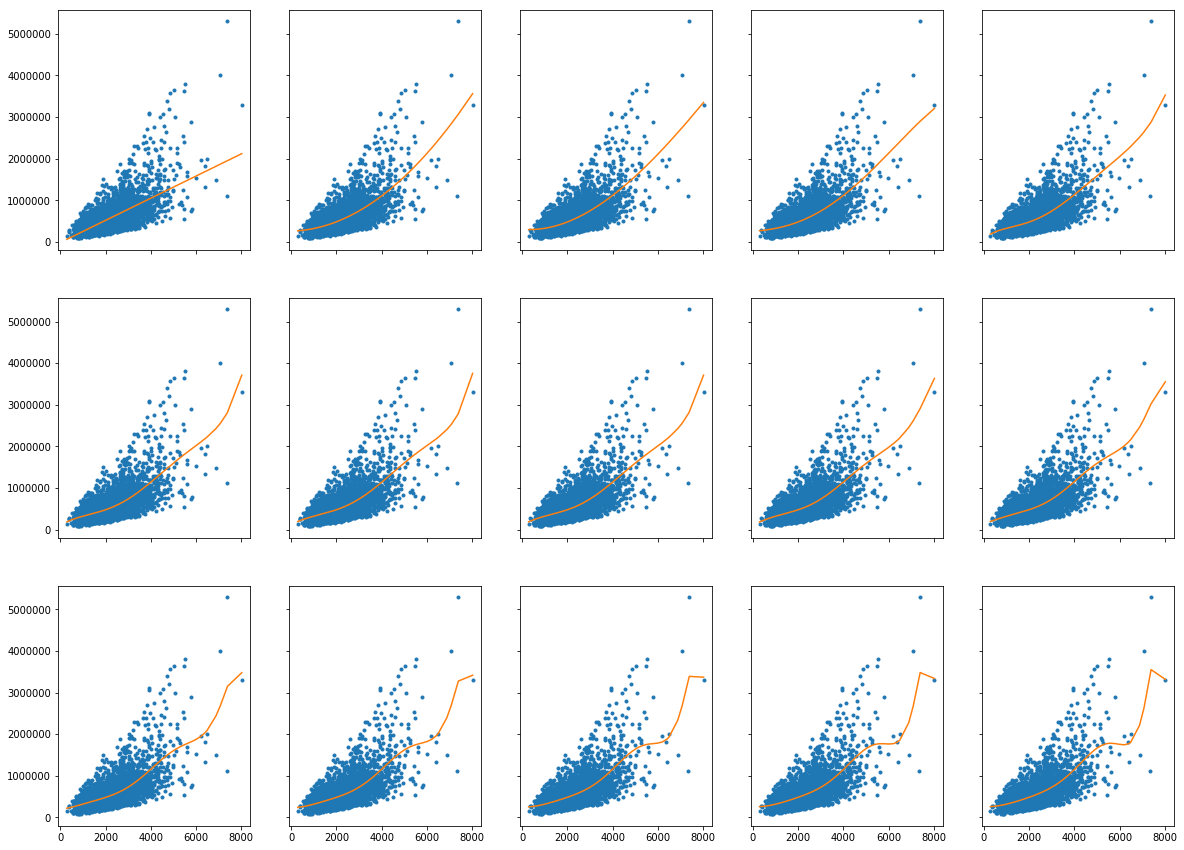

In [173]:
polynomial_regression_plot(15, set_4)

In [174]:
training_and_validation, testing = sales.random_split(0.9, seed=1)

In [175]:
training, validation = training_and_validation.random_split(0.5, seed=1)

In [236]:
def polynomial_regression(degree, t, v):
    RSS = []
    for i in range(1, degree+1):
        poly_data = polynomial_sframe(t['sqft_living'], i)
        features = poly_data.column_names() # get the name of the features
        poly_data['price'] = t['price'] # add price to the data since it's the target
        model = tc.linear_regression.create(poly_data, 
                                            target = 'price', 
                                            features = features, 
                                            validation_set = None, 
                                            verbose=False, 
                                            l2_penalty=0., 
                                            l1_penalty=0.)
        
        validation_data = polynomial_sframe(v['sqft_living'], i)
        validation_data['price'] = v['price']
        
        predictions = model.predict(validation_data)
        residual = predictions.to_numpy() - validation_data['price'].to_numpy()
        RSS.append([i,np.sum(residual**2)])
        
    return tc.SFrame(pd.DataFrame(RSS))
        
RSS = polynomial_regression(15, training, validation)

In [237]:
# RSS.column_names

In [238]:
RSS = RSS.rename({'0': 'index', '1':'RSS'})

In [239]:
index = RSS.sort('RSS')[0]['index']
print(index)

6


In [240]:
RSS = polynomial_regression(15, training, testing)

In [241]:
RSS = RSS.rename({'0': 'index', '1':'RSS'})

In [246]:
RSS[index-1]['RSS']

123989069494927.02